In [97]:
m = 50 # m = n = l, number of data in a single dataset
rep = 800 # num of repeated experiments
n_step = 400 # num of steps

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import comb, perm
from collections import Counter
from scipy.stats import entropy

In [98]:
# the mixing proportion distribution under permutation
mu = np.zeros(m+1)
for itr in range(m+1):
    mu[itr] = comb(m, itr) * comb(2*m, m - itr) / comb(3*m, m) 

In [99]:
# Two-way transposition
base_ex_y2x = np.zeros([rep, n_step]) # the exchange rate of y into x
base_ex_z2x = np.zeros([rep, n_step]) # the exchange rate of z into x

for itr in range(rep):  # itr-th experiment
    x = np.array([m,0,0])
    y = np.array([0,m,0])
    z = np.array([0,0,m])
    data = np.vstack((x,y,z))
    for step in range(n_step): # step-th step
        two_dat = random.sample([0,1,2], 2) # sample two out of [0,1,2] uniformly
        first = two_dat[0]; second = two_dat[1]
        first_sample = np.random.choice(np.array([0,1,2]), p= data[first]/m)
        second_sample = np.random.choice(np.array([0,1,2]), p= data[second]/m)
        data[first][first_sample] -= 1; data[second][first_sample] += 1
        data[first][second_sample] += 1; data[second][second_sample] -=1
        base_ex_y2x[itr][step] = data[0][1]/m

base_rate_mean = np.mean(base_ex_y2x, axis = 0)

In [100]:
# Convergence rate of KL-diverngence
kl_divergence_two = np.zeros(n_step)
for step in range(n_step):
    arr = np.round(base_ex_y2x[:, step] * m).astype(int)
    counter = Counter(arr.tolist())
    total_points = len(arr)
    distribution = {key: count/ total_points for key, count in counter.items()}
    result_array = np.zeros(m + 1)
    for position, value in distribution.items():
        result_array[position] = value
    kl_divergence_two[step] = entropy(result_array, mu)

In [101]:
# Circle-way transposition
# There are two ways of exchange in a circle: x->y->z->x and x->z->y->x
circle_ex_y2x = np.zeros([rep, n_step]) # the exchange rate of y into x
circle_ex_z2x = np.zeros([rep, n_step]) # the exchange rate of z into x
for itr in range(rep):  # itr-th experiment
    x = np.array([m,0,0])
    y = np.array([0,m,0])
    z = np.array([0,0,m])
    data = np.vstack((x,y,z))
    for step in range(n_step): # step-th step
        x_sample = np.random.choice(np.array([0,1,2]), p= data[0]/m)
        y_sample = np.random.choice(np.array([0,1,2]), p= data[1]/m)
        z_sample = np.random.choice(np.array([0,1,2]), p= data[2]/m)
        ex_way = np.random.choice(np.array([0,1]), p= [1/2,1/2]) # 0 represents x->y->z->x and 1 represents x->z->y->x
        if ex_way == 0:
           data[0][x_sample] -= 1; data[1][x_sample] +=1 # x->y
           data[1][y_sample] -= 1; data[2][y_sample] +=1 # y->z
           data[2][z_sample] -= 1; data[0][x_sample] +=1 # z->x
        if ex_way == 1:
           data[0][x_sample] -= 1; data[2][x_sample] +=1 # x->z
           data[2][z_sample] -= 1; data[1][z_sample] +=1 # z->y
           data[1][y_sample] -= 1; data[0][y_sample] +=1 # y->x
        circle_ex_y2x[itr][step] = data[0][1]/m
circle_rate_mean = np.mean(circle_ex_y2x, axis = 0)

In [102]:
# Convergence rate of KL-diverngence
kl_divergence_circle = np.zeros(n_step)
for step in range(n_step):
    arr = np.round(circle_ex_y2x[:, step] * m).astype(int)
    counter = Counter(arr.tolist())
    total_points = len(arr)
    distribution = {key: count/ total_points for key, count in counter.items()}
    result_array = np.zeros(m + 1)
    for position, value in distribution.items():
        result_array[position] = value
    kl_divergence_circle[step] = entropy(result_array, mu)


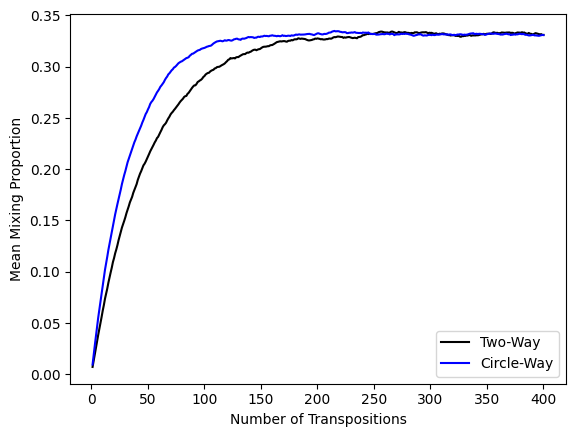

In [17]:
plt.plot(np.arange(1, n_step+1), base_rate_mean, color = 'black', label = 'Two-Way')
plt.plot(np.arange(1, n_step+1), circle_rate_mean, color = 'blue', label = 'Circle-Way')
plt.legend()
plt.xlabel('Number of Transpositions')
plt.ylabel('Mean Mixing Proportion')
#plt.title('Example plot with labeled axes')
plt.show()

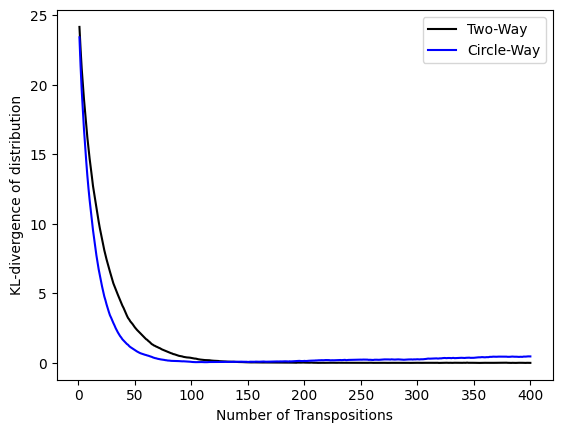

In [103]:
plt.plot(np.arange(1, n_step+1), kl_divergence_two, color = 'black', label = 'Two-Way')
plt.plot(np.arange(1, n_step+1), kl_divergence_circle, color = 'blue', label = 'Circle-Way')
plt.legend()
plt.xlabel('Number of Transpositions')
plt.ylabel('KL-divergence of distribution')
#plt.title('Example plot with labeled axes')
plt.show()